<a href="https://colab.research.google.com/github/mohamedprojects/Machine-Learning/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest Neighbors

In [4]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/teleCust1000t.csv

--2021-10-10 22:44:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K  --.-KB/s    in 0.02s   

2021-10-10 22:44:32 (1.60 MB/s) - ‘teleCust1000t.csv’ saved [36047/36047]



###Load required libraries


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing

### Load Data



In [6]:
df = pd.read_csv('teleCust1000t.csv')
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


###Data Visualization and Analysis

In [7]:
df['retire'].unique()


array([0., 1.])

In [8]:
df['marital'].unique()

array([1, 0])

In [9]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f609d9e8790>]],
      dtype=object)

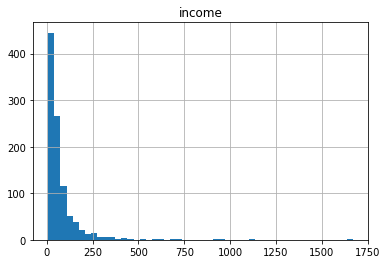

In [10]:
df.hist(column="income", bins= 50)

### Feature set


In [11]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [12]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [13]:
Y = df['custcat'].values
Y[0:5]

array([1, 4, 3, 1, 3])

## Normalize Data


In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Split our data


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
print(' Train set:', x_train.shape, y_train.shape, '\n','Test set:',x_test.shape ,y_test.shape)

 Train set: (800, 11) (800,) 
 Test set: (200, 11) (200,)


###Classification

In [15]:
# Import library
from sklearn.neighbors import KNeighborsClassifier


In [16]:
# Training 
# Start the algorithm with k=4 :
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [17]:
# Use the model to predict the test set :
yhat = neigh.predict(x_test)
yhat[:10]

array([3, 1, 3, 4, 4, 3, 3, 1, 2, 2])

In [18]:
# Accuracy evaluation

from sklearn import metrics
print("Train set accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set accuracy:  0.55625
Test set accuracy:  0.26


In [24]:
#  Choose a different value for k=4 :
k = 6
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
print(" Train set accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)), '\n', 'Test set accuracy: ', metrics.balanced_accuracy_score(y_test, neigh.predict(x_test)))

 Train set accuracy:  0.495 
 Test set accuracy:  0.2916047732224203


In [27]:
# Calculate the accuracy of KNN for different Ks:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.295, 0.35 , 0.33 , 0.32 ])

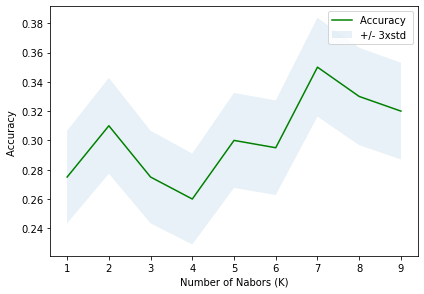

In [37]:
# Plot  model accuracy  for Different number of Neighbors

plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.tight_layout()
plt.xlabel('Number of Nabors (K)')
plt.show()

In [39]:
print('The best accuracy is :', mean_acc.max(), 'with k=', mean_acc.argmax()+1)

The best accuracy is : 0.35 with k= 7
